In [ ]:
############################################################################################
#   PROJET TND : Prédire / diagnostiquer les troubles du langage chez l’enfant.            #
#   Classification binaire avec des données déséquilibrées.                                #
#------------------------------------------------------------------------------------------#
#   NOTEBOOK DE PREDICTION AVEC UN DECOUPAGE CROSS VALIDATE :                              #
#      ---> data preparation                                                               #
#      ---> algorithmes d'apprentissage supervisé                                          #
#           (pour résoudre un problème de classification) :                                #
#           * Les K plus proches voisins                                                   #
#           * Modèles linéaires :                                                          #
#               - Modèles linéaires - régression logistique                                #
#               - Modèles linéaires - classification SVM linéaire                          #
#           * Arbres de décision                                                           #
#           * Ensemble d'arbres de décision                                                #
#               - Ensemble d'arbres de décision - forêts aléatoires                        #
#               - Ensemble d'arbres de décision - boosting d'arbres de régression /        #
#                                                 GBRT (Gradient Boosted Regression Trees) #
#           * Réseaux de neurones                                                          #
############################################################################################

In [ ]:
################################################################################
#   GITHUB                                                                     #
#------------------------------------------------------------------------------#
# GitHub                : https://github.com/irribarre                         #
# Repository projet TND : https://github.com/irribarre/Classification_1        #
# Notebook 1            : github_3_prediction_decoupage_cross_validation.ipynb #
################################################################################

In [ ]:
#############################################################################
# PLAN CODE :                                                               #
#############################################################################
# 1. DATA PREPARATION
#    1.1. DECOUPAGE X / y
#
# 2. DONNEES COMMUNES
#    2.1. VARIABLES COMMUNES
#    2.2. FONCTIONS COMMUNES
#         2.2.1. EVALUATION METRIQUES
#         2.2.2. AFFICHAGE TRAIN & TEST ACCURACY
#         2.2.3. AFFICHAGE METRIQUES
#
# 3. LES K PLUS PROCHES VOISINS
#
# 4. MODELES LINEAIRES - REGRESSION LOGISTIQUE
#
# 5. MODELES LINEAIRES - CLASSIFICATION SVM LINEAIRE
#
# 6. ARBRES DE DECISION
#
# 7. ENSEMBLE D'ARBRES DE DECISION - FORETS ALEATOIRES
#
# 8. ENSEMBLE D'ARBRES DE DECISION - BOOSTING D'ARBRES DE REGRESSION / GBRT (GRADIENT BOOSTED REGRESSION TREES)
#
# 9. RESEAUX DE NEURONES
#
# 10. SYNTHESE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Algorithmes sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Métriques
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Warning
from warnings import simplefilter

In [2]:
# On ignore certains warning
# https://stackoverflow.com/questions/74877602/getting-a-warning-when-using-sklearn-neighbors-about-keepdims
simplefilter(action = 'ignore', category = FutureWarning)

In [3]:
################################################
#      Chargement jeu de données nettoyées     #
################################################
data = pd.read_csv('all_data_R_high_cor_removed_clean.csv',  sep = '\t')

In [4]:
data.columns

Index(['sex', 'age', 'corpus', 'group', 'child_TNW', 'child_TNS',
       'examiner_TNW', 'freq_ttr', 'r_2_i_verbs', 'num_pos_tags', 'n_dos',
       'repetition', 'retracing', 'fillers', 's_1g_ppl', 's_2g_ppl',
       's_3g_ppl', 'd_1g_ppl', 'd_2g_ppl', 'average_syl', 'mlu_words',
       'mlu100_utts', 'verb_utt', 'dss', 'ipsyn_total', 'present_progressive',
       'propositions_in', 'propositions_on', 'plural_s',
       'irregular_past_tense', 'possessive_s', 'uncontractible_copula',
       'articles', 'regular_past_ed', 'regular_3rd_person_s',
       'irregular_3rd_person', 'uncontractible_aux', 'contractible_copula',
       'contractible_aux', 'word_errors', 'f_k', 'n_v', 'n_aux', 'n_3s_v',
       'det_n_pl', 'det_pl_n', 'pro_aux', 'pro_3s_v', 'total_error',
       'age_int'],
      dtype='object')

In [5]:
data.dtypes

sex                        int64
age                        int64
corpus                     int64
group                      int64
child_TNW                  int64
child_TNS                  int64
examiner_TNW               int64
freq_ttr                 float64
r_2_i_verbs              float64
num_pos_tags               int64
n_dos                      int64
repetition                 int64
retracing                  int64
fillers                    int64
s_1g_ppl                 float64
s_2g_ppl                 float64
s_3g_ppl                 float64
d_1g_ppl                 float64
d_2g_ppl                 float64
average_syl              float64
mlu_words                float64
mlu100_utts                int64
verb_utt                 float64
dss                      float64
ipsyn_total                int64
present_progressive        int64
propositions_in            int64
propositions_on            int64
plural_s                   int64
irregular_past_tense       int64
possessive

# 1. DATA PREPARATION

# 1.1. DECOUPAGE X / y

In [6]:
#######################################
# Découpage input features and target #
#######################################
def decoupage_X_y(df_suffix_in, df_in):
    
    ####################################
    #   X = données sans le résultat   #
    ####################################
    # Données internes = données brutes auxquelles on enlève :
    #    > la colonne 'group', car c'est la sortie / résultat. 
    X = df_in.drop(['group'], axis = 1)


    ####################################
    #         y = résultat             #
    ####################################
    y = df_in['group']
    
    
    print('X' + df_suffix_in + ' shape :', X.shape)
    print('y' + df_suffix_in + ' shape :', y.shape)
    
    return X, y

In [7]:
###################################################
# Découpage X, y :                                #
# données déséquilibrées : dataframe data         #
###################################################
X, y = decoupage_X_y(df_suffix_in = '', # pas de suffixe
                     df_in        = data)

X shape : (1163, 49)
y shape : (1163,)


# 2. DONNEES COMMUNES

# 2.1. VARIABLES COMMUNES

In [8]:
# Par défaut cross_val_score effectue une validation croisée à 3 plis
CV_settings = range(3, 200)

In [9]:
########################################################
# Liste des algorithme de chaque classifier            #
########################################################
algo_name_list = ['algo_knn',        # Classification k-NN (knn = k-nearest neighbors) / KNeighborsClassifier
             
                 # ----------------------------------------
                 # Modèles linéaires
                 # ----------------------------------------             
                 'algo_logreg',     # Classification linéaire régression logistique   / LogisticRegression
                 'algo_linear_svm', # Classification SVM lineaire                     / LinearSVC
             
                 'algo_tree',       # Classification arbre de décision                / DecisionTreeClassifier
             
                 # ----------------------------------------
                 # Ensemble d'arbres de décision
                 # ----------------------------------------             
                 'algo_forest',     # Classification forêt aléatoire                  / RandomForestClassifier
                 'algo_gbrt',       # Classification  boosting d'arbres de régression / GradientBoostingClassifier
                                    # GBRT (Gradient Boosted Regression Trees)
             
                 'algo_mlp']        # Classification perceptron multicouche           / MLPClassifier
                                    # MLP (MultiLayer Perceptron)

In [10]:
print('algo_name_list =', algo_name_list)

algo_name_list = ['algo_knn', 'algo_logreg', 'algo_linear_svm', 'algo_tree', 'algo_forest', 'algo_gbrt', 'algo_mlp']


# 2.2. FONCTIONS COMMUNES

# 2.2.1. EVALUATION METRIQUES

In [11]:
#####################################################
# Fonction estimator cross validation :             #
# Evaluate metric(s) by cross-validation            #
#####################################################
def estimator_cv(estimator_in, CV_in):
    
    # découpage training data et testing data
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
    scores = cross_validate(estimator          = estimator_in, 
                            X                  = X, 
                            y                  = y, 
                            cv                 = CV_in, 
                            return_train_score = True)
  
    # niveau d'exactitude de la prédiction sur le jeu de train
    train_accuracy_out = scores['train_score'].mean()

    # niveau d'exactitude de la prédiction sur le jeu de test
    test_accuracy_out = scores['test_score'].mean()

    print('train set accuracy = {:.3f}'.format(train_accuracy_out), 
          ', test set accuracy = {:.3f}'.format(test_accuracy_out),
          ', CV = ', CV_in)

    return train_accuracy_out, test_accuracy_out

# 2.2.2. AFFICHAGE TRAIN & TEST ACCURACY

In [12]:
# -----------------------------------------------------------------------------------------------------------
# Affichage de l'exactitude de l'apprentissage et du test en fonction de cv
# -----------------------------------------------------------------------------------------------------------
def affichage_train_test_accuracy(algo_name_in,
                                  train_accuracy_in,
                                  test_accuracy_in):

    plt.figure(figsize = (5.5, 3.5)) # (WIDTH_SIZE, HEIGHT_SIZE)

    plt.plot(CV_settings, train_accuracy_in, label = 'train accuracy')
    plt.plot(CV_settings, test_accuracy_in, label = 'test accuracy')

    plt.xlabel('CV')
    plt.ylabel('Accuracy')
    plt.title(algo_name_in + ' : train / test accuracy', 
              fontsize = 12, color = 'blue', fontweight = 'bold') 
    plt.grid()
    plt.legend()
    plt.show()

# 2.2.3. AFFICHAGE METRIQUES

In [13]:
# -------------------------------------------------------
# Métriques du meilleur score : 
# Calcul et mise à jour dans dict_metric_in
# -------------------------------------------------------
# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
def metrics_best_score(algo_name_in, y_pred_in, is_affichage_in):

    #################################################
    # MATRICE DE CONFUSION :                        #
    #################################################    
    # Matrice de confusion : résumé des résultats de prédictions sur un problème de classification.
    #
    # |                           |    Classe prédite   |
    # |                           | NO (TD) | YES (SLI) |
    # |---------------------------|---------|-----------|
    # | Classe réelle | NO (TD)   |    TN   |     FP    |
    # |               | YES (SLI) |    FN   |     TP    |
    
    # Matrice de confusion
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    # Base = y_pred 
    
    confusion = confusion_matrix(y_true = y,         # y_test_in pour découpage train / test split
                                 y_pred = y_pred_in)
    if (is_affichage_in):
        print('Confusion matrix :\n{}'.format(confusion), '\n')

    # Matrice de confusion normalisée
    confusion_matrix_normalised = confusion * round(len(y) / len(y_pred_in)) # y_in pour découpage train / test split
    if (is_affichage_in):    
        print('Confusion matrix normalised :\n{}'.format(confusion_matrix_normalised))
    
    # Classification report
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
    classification_report_ = classification_report(y_true = y,         # y_test_in pour découpage train / test split
                                                   y_pred = y_pred_in)
    if (is_affichage_in):    
        print('\nClassification report :\n', classification_report_, '\n')

    
    
    #################################################
    # ACCURACY SCORE                                #
    #################################################
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    #
    # Accuracy score : rapport entre le nombre de prédictions correctes et le nombre total d’échantillons traités.
    #
    #                  TP + TN
    # accuracy = -------------------
    #             TP + TN + FP + FN
    
    accuracy_score_ = accuracy_score(y_true = y,         # y_test_in pour découpage train / test split
                                     y_pred = y_pred_in)
    print('Accuracy score\t= {:.3f}'.format(accuracy_score_))

 
    
    #################################################
    # RECALL SCORE                                  #
    #################################################
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
    #
    # Recall score (ou sensibilité ou taux positif réel) : nombre de vrais positifs divisé par le nombre de valeurs 
    # positives dans les données de test. C’est une mesure de l’exhaustivité du classifieur. 
    # Un faible recall indique un nombre élevé de faux négatifs.
    #
    #                    True Positive
    # recall = --------------------------------
    #           True Positive + False Negative
    
    recall_score_ = recall_score(y_true = y,         # y_test_in pour découpage train / test split
                                 y_pred = y_pred_in)
    print('Recall score\t= {:.3f}'.format(recall_score_))

    
    
    #################################################
    # PRECISION SCORE                               #
    #################################################   
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
    #
    # Precision score (ou valeur prédictive positive) : nombre de vrais positifs divisé par toutes les prédictions positives.
    # C’est une mesure de l’exactitude du classificateur. 
    # Une faible précision indique un nombre élevé de faux positifs.
    #    
    #                       True Positive
    # precision = --------------------------------
    #              True Positive + False Positive
    
    precision_score_ = precision_score(y_true = y,         # y_test_in pour découpage train / test split
                                       y_pred = y_pred_in)
    print('Precision score\t= {:.3f}'.format(precision_score_))

     
    
    #################################################
    # F1 SCORE                                      # 
    #################################################     
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
    #
    # F1 score : moyenne pondérée de la précision et du recall. 
    # 1 indique une précision et recall parfaits et 0 pire.
    #
    #          Precision * Recall
    # F1 = 2* --------------------
    #          Precision + Recall

    f1_score_ = f1_score(y_true = y,         # y_test_in pour découpage train / test split
                         y_pred = y_pred_in)
    print('F1 score\t= {:.3f}'.format(f1_score_))

# 3. LES K PLUS PROCHES VOISINS

In [14]:
# -------------------------------------------------------------------------
# Fonction K_plus_proches_voisins 
# -------------------------------------------------------------------------
def K_plus_proches_voisins_cv(is_affichage_in):
    
    # initialisation
    best_test_accuracy_knn_cv        = 0
    best_test_CV_knn_cv              = 0
    associated_train_accuracy_knn_cv = 0
    train_accuracy_estimator_cv      = []
    test_accuracy_estimator_cv       = []
    algo_name                        = 'algo_knn'


    # Estimator (sans hyperparamètres)
    knn_cv = KNeighborsClassifier()

    # ---------------------------------------------------------
    # Recherche du meilleur score
    # ---------------------------------------------------------
    for ind in CV_settings:
   
        train_accuracy, test_accuracy = estimator_cv(knn_cv, ind)

        # Stockage dans les listes
        train_accuracy_estimator_cv.append(train_accuracy)
        test_accuracy_estimator_cv.append(test_accuracy)

        # Meilleur score (données test)    
        if (test_accuracy > best_test_accuracy_knn_cv):
            best_test_accuracy_knn_cv        = test_accuracy
            best_test_CV_knn_cv              = ind
            associated_train_accuracy_knn_cv = train_accuracy


    # ---------------------------------------------------------------------------------------------
    # Prédiction avec le meilleur cv = best_test_CV_xxx_cv
    # ---------------------------------------------------------------------------------------------
    y_pred_knn = cross_val_predict(estimator = knn_cv, 
                                   X         = X, 
                                   y         = y, 
                                   cv        = best_test_CV_knn_cv)


    # ---------------------------------------------------------------------------------------------
    # Affichage (pour comparaison) de l'exactitude de l'apprentissage et du test en fonction de cv
    # --------------------------------------------------------------------------------------------- 
    affichage_train_test_accuracy(algo_name_in      = algo_name,
                                  train_accuracy_in = train_accuracy_estimator_cv,
                                  test_accuracy_in  = test_accuracy_estimator_cv)
    
    
    # -------------------------------------------------------
    # Informations du meilleur score 
    # -------------------------------------------------------  
    print('\n\n\n')        
    print('@' * 40, algo_name, ': best parameters information', '@' * 15)    
    print('best test set accuracy = {:.3f}'.format(best_test_accuracy_knn_cv),
          ', best test CV =', best_test_CV_knn_cv,
          ', associated train set accuracy = {:.3f}'.format(associated_train_accuracy_knn_cv)) 
    
    
    # -------------------------------------------------------
    # Métriques du meilleur score 
    # -------------------------------------------------------
    print('\n\n\n')        
    print('@' * 40, algo_name, ': best parameters metrics', '@' * 19)
    metrics_best_score(algo_name_in    = algo_name,
                       y_pred_in       = y_pred_knn,
                       is_affichage_in = is_affichage_in)

train set accuracy = 0.830 , test set accuracy = 0.710 , CV =  3
train set accuracy = 0.825 , test set accuracy = 0.701 , CV =  4
train set accuracy = 0.824 , test set accuracy = 0.730 , CV =  5
train set accuracy = 0.825 , test set accuracy = 0.726 , CV =  6
train set accuracy = 0.824 , test set accuracy = 0.721 , CV =  7
train set accuracy = 0.824 , test set accuracy = 0.733 , CV =  8
train set accuracy = 0.824 , test set accuracy = 0.712 , CV =  9
train set accuracy = 0.823 , test set accuracy = 0.739 , CV =  10
train set accuracy = 0.823 , test set accuracy = 0.734 , CV =  11
train set accuracy = 0.823 , test set accuracy = 0.744 , CV =  12
train set accuracy = 0.823 , test set accuracy = 0.741 , CV =  13
train set accuracy = 0.823 , test set accuracy = 0.739 , CV =  14
train set accuracy = 0.822 , test set accuracy = 0.738 , CV =  15
train set accuracy = 0.823 , test set accuracy = 0.740 , CV =  16
train set accuracy = 0.822 , test set accuracy = 0.753 , CV =  17
train set accurac

train set accuracy = 0.821 , test set accuracy = 0.768 , CV =  127
train set accuracy = 0.821 , test set accuracy = 0.768 , CV =  128
train set accuracy = 0.821 , test set accuracy = 0.767 , CV =  129
train set accuracy = 0.821 , test set accuracy = 0.767 , CV =  130
train set accuracy = 0.821 , test set accuracy = 0.767 , CV =  131
train set accuracy = 0.821 , test set accuracy = 0.766 , CV =  132
train set accuracy = 0.821 , test set accuracy = 0.768 , CV =  133
train set accuracy = 0.821 , test set accuracy = 0.768 , CV =  134
train set accuracy = 0.821 , test set accuracy = 0.767 , CV =  135
train set accuracy = 0.821 , test set accuracy = 0.767 , CV =  136
train set accuracy = 0.821 , test set accuracy = 0.767 , CV =  137
train set accuracy = 0.821 , test set accuracy = 0.768 , CV =  138
train set accuracy = 0.821 , test set accuracy = 0.768 , CV =  139
train set accuracy = 0.821 , test set accuracy = 0.768 , CV =  140
train set accuracy = 0.821 , test set accuracy = 0.768 , CV = 

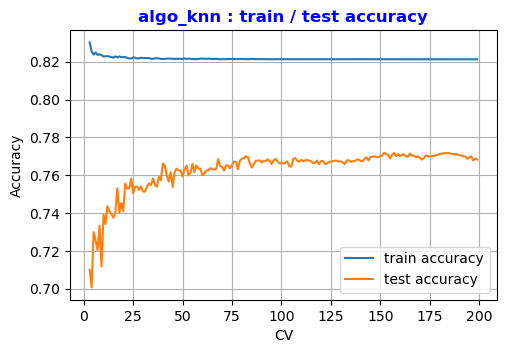





@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ algo_knn : best parameters information @@@@@@@@@@@@@@@
best test set accuracy = 0.772 , best test CV = 152 , associated train set accuracy = 0.821




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ algo_knn : best parameters metrics @@@@@@@@@@@@@@@@@@@
Confusion matrix :
[[837  59]
 [207  60]] 

Confusion matrix normalised :
[[837  59]
 [207  60]]

Classification report :
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       896
           1       0.50      0.22      0.31       267

    accuracy                           0.77      1163
   macro avg       0.65      0.58      0.59      1163
weighted avg       0.73      0.77      0.74      1163
 

Accuracy score	= 0.771
Recall score	= 0.225
Precision score	= 0.504
F1 score	= 0.311


In [15]:
K_plus_proches_voisins_cv(is_affichage_in = True)

# 4. MODELES LINEAIRES - REGRESSION LOGISTIQUE

In [16]:
# ---------------------------------------------------------------------------------------
# Fonction classification linéaire régression logistique 
# ---------------------------------------------------------------------------------------
def modele_lineaire_regression_logistique_cv(is_affichage_in):

    # initialisation
    best_test_accuracy_logreg_cv        = 0
    best_test_CV_logreg_cv              = 0
    associated_train_accuracy_logreg_cv = 0
    train_accuracy_estimator_cv         = []
    test_accuracy_estimator_cv          = []
    algo_name                           = 'algo_logreg'


    # Estimator (avec le mimimum d'hyperparamètres pour éviter les warnings)   
    logreg_cv = LogisticRegression(solver = 'liblinear', penalty = 'l2', max_iter = 10000)

    # ---------------------------------------------------------
    # Recherche du meilleur score
    # ---------------------------------------------------------
    for ind in CV_settings:
   
        train_accuracy, test_accuracy = estimator_cv(logreg_cv, ind)
    
        # Stockage dans les listes
        train_accuracy_estimator_cv.append(train_accuracy)
        test_accuracy_estimator_cv.append(test_accuracy)
        
        # Meilleur score (données test)    
        if (test_accuracy > best_test_accuracy_logreg_cv):
            best_test_accuracy_logreg_cv        = test_accuracy
            best_test_CV_logreg_cv              = ind
            associated_train_accuracy_logreg_cv = train_accuracy

        
    # ---------------------------------------------------------------------------------------------
    # Prédiction avec le meilleur cv = best_test_CV_xxx_cv
    # ---------------------------------------------------------------------------------------------
    y_pred_logreg = cross_val_predict(estimator = logreg_cv, 
                                      X         = X, 
                                      y         = y, 
                                      cv        = best_test_CV_logreg_cv)
    
    
    # ---------------------------------------------------------------------------------------------
    # Affichage (pour comparaison) de l'exactitude de l'apprentissage et du test en fonction de cv
    # --------------------------------------------------------------------------------------------- 
    affichage_train_test_accuracy(algo_name_in      = algo_name,
                                  train_accuracy_in = train_accuracy_estimator_cv,
                                  test_accuracy_in  = test_accuracy_estimator_cv)
    
    
    # -------------------------------------------------------
    # Informations du meilleur score 
    # -------------------------------------------------------     
    print('\n\n\n')        
    print('@' * 40, algo_name, ': best parameters information', '@' * 15)    
    print('best test set accuracy = {:.3f}'.format(best_test_accuracy_logreg_cv),
          ', best test CV =', best_test_CV_logreg_cv,
          ', associated train set accuracy = {:.3f}'.format(associated_train_accuracy_logreg_cv)) 
       
 
    # -------------------------------------------------------
    # Métriques du meilleur score 
    # -------------------------------------------------------
    print('\n\n\n')        
    print('@' * 40, algo_name, ': best parameters metrics', '@' * 19)
    metrics_best_score(algo_name_in    = algo_name,
                       y_pred_in       = y_pred_logreg,
                       is_affichage_in = is_affichage_in)

train set accuracy = 0.873 , test set accuracy = 0.727 , CV =  3
train set accuracy = 0.868 , test set accuracy = 0.721 , CV =  4
train set accuracy = 0.868 , test set accuracy = 0.728 , CV =  5
train set accuracy = 0.864 , test set accuracy = 0.755 , CV =  6
train set accuracy = 0.866 , test set accuracy = 0.732 , CV =  7
train set accuracy = 0.865 , test set accuracy = 0.751 , CV =  8
train set accuracy = 0.865 , test set accuracy = 0.732 , CV =  9
train set accuracy = 0.864 , test set accuracy = 0.825 , CV =  10
train set accuracy = 0.865 , test set accuracy = 0.819 , CV =  11
train set accuracy = 0.863 , test set accuracy = 0.825 , CV =  12
train set accuracy = 0.864 , test set accuracy = 0.829 , CV =  13
train set accuracy = 0.864 , test set accuracy = 0.823 , CV =  14
train set accuracy = 0.864 , test set accuracy = 0.828 , CV =  15
train set accuracy = 0.864 , test set accuracy = 0.820 , CV =  16
train set accuracy = 0.863 , test set accuracy = 0.829 , CV =  17
train set accurac

train set accuracy = 0.861 , test set accuracy = 0.836 , CV =  127
train set accuracy = 0.861 , test set accuracy = 0.837 , CV =  128
train set accuracy = 0.861 , test set accuracy = 0.837 , CV =  129
train set accuracy = 0.861 , test set accuracy = 0.838 , CV =  130
train set accuracy = 0.861 , test set accuracy = 0.841 , CV =  131
train set accuracy = 0.861 , test set accuracy = 0.838 , CV =  132
train set accuracy = 0.861 , test set accuracy = 0.840 , CV =  133
train set accuracy = 0.861 , test set accuracy = 0.840 , CV =  134
train set accuracy = 0.861 , test set accuracy = 0.839 , CV =  135
train set accuracy = 0.861 , test set accuracy = 0.839 , CV =  136
train set accuracy = 0.861 , test set accuracy = 0.841 , CV =  137
train set accuracy = 0.861 , test set accuracy = 0.838 , CV =  138
train set accuracy = 0.861 , test set accuracy = 0.837 , CV =  139
train set accuracy = 0.861 , test set accuracy = 0.837 , CV =  140
train set accuracy = 0.861 , test set accuracy = 0.838 , CV = 

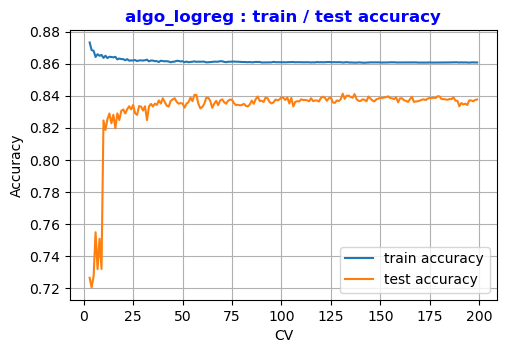





@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ algo_logreg : best parameters information @@@@@@@@@@@@@@@
best test set accuracy = 0.841 , best test CV = 131 , associated train set accuracy = 0.861




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ algo_logreg : best parameters metrics @@@@@@@@@@@@@@@@@@@
Confusion matrix :
[[844  52]
 [133 134]] 

Confusion matrix normalised :
[[844  52]
 [133 134]]

Classification report :
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       896
           1       0.72      0.50      0.59       267

    accuracy                           0.84      1163
   macro avg       0.79      0.72      0.75      1163
weighted avg       0.83      0.84      0.83      1163
 

Accuracy score	= 0.841
Recall score	= 0.502
Precision score	= 0.720
F1 score	= 0.592


In [17]:
modele_lineaire_regression_logistique_cv(is_affichage_in = True)

# 5. MODELES LINEAIRES - CLASSIFICATION SVM LINEAIRE

In [18]:
# -------------------------------------------------------------
# Fonction classification SVM lineaire
# -------------------------------------------------------------
def classification_svm_lineaire_cv(is_affichage_in):

    # initialisation
    best_test_accuracy_linear_svm_cv        = 0
    best_test_CV_linear_svm_cv              = 0
    associated_train_accuracy_linear_svm_cv = 0
    train_accuracy_estimator_cv             = []
    test_accuracy_estimator_cv              = []
    algo_name                               = 'algo_linear_svm'


    # Estimator (avec le mimimum d'hyperparamètres pour éviter les warnings)   
    linear_svm_cv = LinearSVC(random_state = 0, max_iter = 5000, dual = False)

    # ---------------------------------------------------------
    # Recherche du meilleur score
    # ---------------------------------------------------------
    for ind in CV_settings:
   
        train_accuracy, test_accuracy = estimator_cv(linear_svm_cv, ind)
    
        # Stockage dans les listes
        train_accuracy_estimator_cv.append(train_accuracy)
        test_accuracy_estimator_cv.append(test_accuracy)
    
        # Meilleur score (données test)    
        if (test_accuracy > best_test_accuracy_linear_svm_cv):
            best_test_accuracy_linear_svm_cv        = test_accuracy
            best_test_CV_linear_svm_cv              = ind
            associated_train_accuracy_linear_svm_cv = train_accuracy

        
    # ---------------------------------------------------------------------------------------------
    # Prédiction avec le meilleur cv = best_test_CV_xxx_cv
    # ---------------------------------------------------------------------------------------------
    y_pred_linear_svm = cross_val_predict(estimator = linear_svm_cv, 
                                          X         = X, 
                                          y         = y, 
                                          cv        = best_test_CV_linear_svm_cv)


    # ---------------------------------------------------------------------------------------------
    # Affichage (pour comparaison) de l'exactitude de l'apprentissage et du test en fonction de cv
    # --------------------------------------------------------------------------------------------- 
    affichage_train_test_accuracy(algo_name_in      = algo_name,
                                  train_accuracy_in = train_accuracy_estimator_cv,
                                  test_accuracy_in  = test_accuracy_estimator_cv)
    
    
    # -------------------------------------------------------
    # Informations du meilleur score 
    # -------------------------------------------------------     
    print('\n\n\n')        
    print('@' * 40, algo_name, ': best parameters information', '@' * 15)    
    print('best test set accuracy = {:.3f}'.format(best_test_accuracy_linear_svm_cv),
          ', best test CV =', best_test_CV_linear_svm_cv,
          ', associated train set accuracy = {:.3f}'.format(associated_train_accuracy_linear_svm_cv))     
    
    
    # -------------------------------------------------------
    # Métriques du meilleur score 
    # -------------------------------------------------------
    print('\n\n\n')        
    print('@' * 40, algo_name, ': best parameters metrics', '@' * 19)
    metrics_best_score(algo_name_in    = algo_name,
                       y_pred_in       = y_pred_linear_svm,
                       is_affichage_in = is_affichage_in)        

train set accuracy = 0.876 , test set accuracy = 0.734 , CV =  3
train set accuracy = 0.869 , test set accuracy = 0.738 , CV =  4
train set accuracy = 0.868 , test set accuracy = 0.734 , CV =  5
train set accuracy = 0.867 , test set accuracy = 0.762 , CV =  6
train set accuracy = 0.868 , test set accuracy = 0.742 , CV =  7
train set accuracy = 0.867 , test set accuracy = 0.772 , CV =  8
train set accuracy = 0.867 , test set accuracy = 0.745 , CV =  9
train set accuracy = 0.867 , test set accuracy = 0.826 , CV =  10
train set accuracy = 0.867 , test set accuracy = 0.817 , CV =  11
train set accuracy = 0.865 , test set accuracy = 0.827 , CV =  12
train set accuracy = 0.866 , test set accuracy = 0.830 , CV =  13
train set accuracy = 0.867 , test set accuracy = 0.827 , CV =  14
train set accuracy = 0.865 , test set accuracy = 0.835 , CV =  15
train set accuracy = 0.864 , test set accuracy = 0.820 , CV =  16
train set accuracy = 0.864 , test set accuracy = 0.834 , CV =  17
train set accurac

train set accuracy = 0.864 , test set accuracy = 0.844 , CV =  127
train set accuracy = 0.864 , test set accuracy = 0.845 , CV =  128
train set accuracy = 0.864 , test set accuracy = 0.844 , CV =  129
train set accuracy = 0.864 , test set accuracy = 0.846 , CV =  130
train set accuracy = 0.864 , test set accuracy = 0.848 , CV =  131
train set accuracy = 0.864 , test set accuracy = 0.846 , CV =  132
train set accuracy = 0.864 , test set accuracy = 0.846 , CV =  133
train set accuracy = 0.864 , test set accuracy = 0.849 , CV =  134
train set accuracy = 0.863 , test set accuracy = 0.845 , CV =  135
train set accuracy = 0.863 , test set accuracy = 0.847 , CV =  136
train set accuracy = 0.864 , test set accuracy = 0.846 , CV =  137
train set accuracy = 0.863 , test set accuracy = 0.843 , CV =  138
train set accuracy = 0.864 , test set accuracy = 0.842 , CV =  139
train set accuracy = 0.864 , test set accuracy = 0.844 , CV =  140
train set accuracy = 0.864 , test set accuracy = 0.842 , CV = 

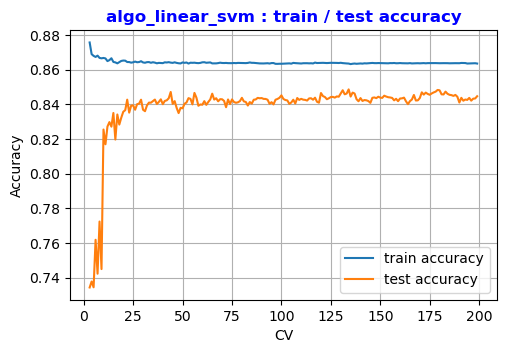





@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ algo_linear_svm : best parameters information @@@@@@@@@@@@@@@
best test set accuracy = 0.849 , best test CV = 134 , associated train set accuracy = 0.864




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ algo_linear_svm : best parameters metrics @@@@@@@@@@@@@@@@@@@
Confusion matrix :
[[853  43]
 [135 132]] 

Confusion matrix normalised :
[[853  43]
 [135 132]]

Classification report :
               precision    recall  f1-score   support

           0       0.86      0.95      0.91       896
           1       0.75      0.49      0.60       267

    accuracy                           0.85      1163
   macro avg       0.81      0.72      0.75      1163
weighted avg       0.84      0.85      0.83      1163
 

Accuracy score	= 0.847
Recall score	= 0.494
Precision score	= 0.754
F1 score	= 0.597


In [19]:
classification_svm_lineaire_cv(is_affichage_in = True)

# 6. ARBRES DE DECISION

In [20]:
# -------------------------------------------------------
# Fonction arbre de décision
# -------------------------------------------------------
def decision_tree_cv(is_affichage_in):
    
    # initialisation
    best_test_accuracy_tree_cv        = 0
    best_test_CV_tree_cv              = 0
    associated_train_accuracy_tree_cv = 0
    train_accuracy_estimator_cv       = []
    test_accuracy_estimator_cv        = []
    algo_name                         = 'algo_tree'


    # Estimator (sans hyperparamètres)
    tree_cv = DecisionTreeClassifier()

    # ---------------------------------------------------------
    # Recherche du meilleur score
    # ---------------------------------------------------------
    for ind in CV_settings:
   
        train_accuracy, test_accuracy = estimator_cv(tree_cv, ind)
    
        # Stockage dans les listes
        train_accuracy_estimator_cv.append(train_accuracy)
        test_accuracy_estimator_cv.append(test_accuracy)
    
        # Meilleur score (données test)    
        if (test_accuracy > best_test_accuracy_tree_cv):
            best_test_accuracy_tree_cv        = test_accuracy
            best_test_CV_tree_cv              = ind
            associated_train_accuracy_tree_cv = train_accuracy

 
    # ---------------------------------------------------------------------------------------------
    # Prédiction avec le meilleur cv = best_test_CV_xxx_cv
    # ---------------------------------------------------------------------------------------------
    y_pred_tree = cross_val_predict(estimator = tree_cv, 
                                    X         = X, 
                                    y         = y, 
                                    cv        = best_test_CV_tree_cv)


    # ---------------------------------------------------------------------------------------------
    # Affichage (pour comparaison) de l'exactitude de l'apprentissage et du test en fonction de cv
    # --------------------------------------------------------------------------------------------- 
    affichage_train_test_accuracy(algo_name_in      = algo_name,
                                  train_accuracy_in = train_accuracy_estimator_cv,
                                  test_accuracy_in  = test_accuracy_estimator_cv)
    
    
    # -------------------------------------------------------
    # Informations du meilleur score 
    # -------------------------------------------------------        
    print('\n\n\n')        
    print('@' * 40, algo_name, ': best parameters information', '@' * 15)    
    print('best test set accuracy = {:.3f}'.format(best_test_accuracy_tree_cv),
          ', best test CV =', best_test_CV_tree_cv,
          ', associated train set accuracy = {:.3f}'.format(associated_train_accuracy_tree_cv)) 
    
    
    # -------------------------------------------------------
    # Métriques du meilleur score 
    # -------------------------------------------------------
    print('\n\n\n')        
    print('@' * 40, algo_name, ': best parameters metrics', '@' * 19)
    metrics_best_score(algo_name_in    = algo_name,
                       y_pred_in       = y_pred_tree,
                       is_affichage_in = is_affichage_in)    

train set accuracy = 1.000 , test set accuracy = 0.655 , CV =  3
train set accuracy = 1.000 , test set accuracy = 0.638 , CV =  4
train set accuracy = 1.000 , test set accuracy = 0.697 , CV =  5
train set accuracy = 1.000 , test set accuracy = 0.664 , CV =  6
train set accuracy = 1.000 , test set accuracy = 0.668 , CV =  7
train set accuracy = 1.000 , test set accuracy = 0.705 , CV =  8
train set accuracy = 1.000 , test set accuracy = 0.685 , CV =  9
train set accuracy = 1.000 , test set accuracy = 0.711 , CV =  10
train set accuracy = 1.000 , test set accuracy = 0.714 , CV =  11
train set accuracy = 1.000 , test set accuracy = 0.709 , CV =  12
train set accuracy = 1.000 , test set accuracy = 0.711 , CV =  13
train set accuracy = 1.000 , test set accuracy = 0.723 , CV =  14
train set accuracy = 1.000 , test set accuracy = 0.730 , CV =  15
train set accuracy = 1.000 , test set accuracy = 0.720 , CV =  16
train set accuracy = 1.000 , test set accuracy = 0.739 , CV =  17
train set accurac

train set accuracy = 1.000 , test set accuracy = 0.763 , CV =  127
train set accuracy = 1.000 , test set accuracy = 0.765 , CV =  128
train set accuracy = 1.000 , test set accuracy = 0.776 , CV =  129
train set accuracy = 1.000 , test set accuracy = 0.778 , CV =  130
train set accuracy = 1.000 , test set accuracy = 0.775 , CV =  131
train set accuracy = 1.000 , test set accuracy = 0.775 , CV =  132
train set accuracy = 1.000 , test set accuracy = 0.784 , CV =  133
train set accuracy = 1.000 , test set accuracy = 0.759 , CV =  134
train set accuracy = 1.000 , test set accuracy = 0.763 , CV =  135
train set accuracy = 1.000 , test set accuracy = 0.770 , CV =  136
train set accuracy = 1.000 , test set accuracy = 0.778 , CV =  137
train set accuracy = 1.000 , test set accuracy = 0.758 , CV =  138
train set accuracy = 1.000 , test set accuracy = 0.759 , CV =  139
train set accuracy = 1.000 , test set accuracy = 0.766 , CV =  140
train set accuracy = 1.000 , test set accuracy = 0.775 , CV = 

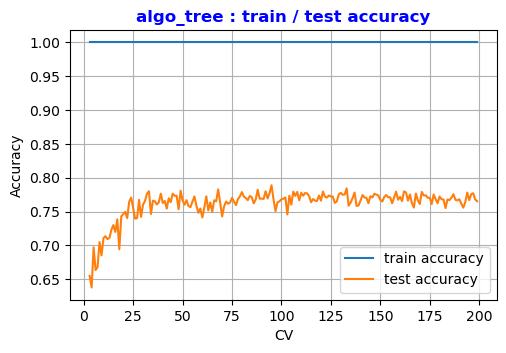





@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ algo_tree : best parameters information @@@@@@@@@@@@@@@
best test set accuracy = 0.789 , best test CV = 95 , associated train set accuracy = 1.000




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ algo_tree : best parameters metrics @@@@@@@@@@@@@@@@@@@
Confusion matrix :
[[751 145]
 [129 138]] 

Confusion matrix normalised :
[[751 145]
 [129 138]]

Classification report :
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       896
           1       0.49      0.52      0.50       267

    accuracy                           0.76      1163
   macro avg       0.67      0.68      0.67      1163
weighted avg       0.77      0.76      0.77      1163
 

Accuracy score	= 0.764
Recall score	= 0.517
Precision score	= 0.488
F1 score	= 0.502


In [21]:
decision_tree_cv(is_affichage_in = True)

# 7. ENSEMBLE D'ARBRES DE DECISION - FORETS ALEATOIRES

In [22]:
# ---------------------------------------------------------
# Fonction forêt aléatoire 
# ---------------------------------------------------------
def random_forest_cv(is_affichage_in):

    # initialisation
    best_test_accuracy_forest_cv        = 0
    best_test_CV_forest_cv              = 0
    associated_train_accuracy_forest_cv = 0
    train_accuracy_estimator_cv         = []
    test_accuracy_estimator_cv          = []
    algo_name                           = 'algo_forest'


    # Estimator (sans hyperparamètres)
    forest_cv = RandomForestClassifier()

    # ---------------------------------------------------------
    # Recherche du meilleur score
    # ---------------------------------------------------------
    for ind in CV_settings:
   
        train_accuracy, test_accuracy = estimator_cv(forest_cv, ind)
    
        # Stockage dans les listes
        train_accuracy_estimator_cv.append(train_accuracy)
        test_accuracy_estimator_cv.append(test_accuracy)
    
        # Meilleur score (données test)    
        if (test_accuracy > best_test_accuracy_forest_cv):
            best_test_accuracy_forest_cv        = test_accuracy
            best_test_CV_forest_cv              = ind
            associated_train_accuracy_forest_cv = train_accuracy

        
    # ---------------------------------------------------------------------------------------------
    # Prédiction avec le meilleur cv = best_test_CV_xxx_cv
    # ---------------------------------------------------------------------------------------------
    y_pred_forest = cross_val_predict(estimator = forest_cv, 
                                      X         = X, 
                                      y         = y, 
                                      cv        = best_test_CV_forest_cv)


    # ---------------------------------------------------------------------------------------------
    # Affichage (pour comparaison) de l'exactitude de l'apprentissage et du test en fonction de cv
    # --------------------------------------------------------------------------------------------- 
    affichage_train_test_accuracy(algo_name_in      = algo_name,
                                  train_accuracy_in = train_accuracy_estimator_cv,
                                  test_accuracy_in  = test_accuracy_estimator_cv)
    
    
    # -------------------------------------------------------
    # Informations du meilleur score 
    # ------------------------------------------------------- 
    print('\n\n\n')        
    print('@' * 40, algo_name, ': best parameters information', '@' * 15)    
    print('best test set accuracy = {:.3f}'.format(best_test_accuracy_forest_cv),
          ', best test CV =', best_test_CV_forest_cv,
          ', associated train set accuracy = {:.3f}'.format(associated_train_accuracy_forest_cv))    
    
    
    # -------------------------------------------------------
    # Métriques du meilleur score 
    # -------------------------------------------------------
    print('\n\n\n')        
    print('@' * 40, algo_name, ': best parameters metrics', '@' * 19)
    metrics_best_score(algo_name_in    = algo_name,
                       y_pred_in       = y_pred_forest,
                       is_affichage_in = is_affichage_in)        

train set accuracy = 1.000 , test set accuracy = 0.749 , CV =  3
train set accuracy = 1.000 , test set accuracy = 0.760 , CV =  4
train set accuracy = 1.000 , test set accuracy = 0.781 , CV =  5
train set accuracy = 1.000 , test set accuracy = 0.788 , CV =  6
train set accuracy = 1.000 , test set accuracy = 0.770 , CV =  7
train set accuracy = 1.000 , test set accuracy = 0.801 , CV =  8
train set accuracy = 1.000 , test set accuracy = 0.788 , CV =  9
train set accuracy = 1.000 , test set accuracy = 0.815 , CV =  10
train set accuracy = 1.000 , test set accuracy = 0.812 , CV =  11
train set accuracy = 1.000 , test set accuracy = 0.826 , CV =  12
train set accuracy = 1.000 , test set accuracy = 0.835 , CV =  13
train set accuracy = 1.000 , test set accuracy = 0.824 , CV =  14
train set accuracy = 1.000 , test set accuracy = 0.825 , CV =  15
train set accuracy = 1.000 , test set accuracy = 0.821 , CV =  16
train set accuracy = 1.000 , test set accuracy = 0.826 , CV =  17
train set accurac

train set accuracy = 1.000 , test set accuracy = 0.847 , CV =  127
train set accuracy = 1.000 , test set accuracy = 0.842 , CV =  128
train set accuracy = 1.000 , test set accuracy = 0.850 , CV =  129
train set accuracy = 1.000 , test set accuracy = 0.843 , CV =  130
train set accuracy = 1.000 , test set accuracy = 0.849 , CV =  131
train set accuracy = 1.000 , test set accuracy = 0.848 , CV =  132
train set accuracy = 1.000 , test set accuracy = 0.849 , CV =  133
train set accuracy = 1.000 , test set accuracy = 0.850 , CV =  134
train set accuracy = 1.000 , test set accuracy = 0.842 , CV =  135
train set accuracy = 1.000 , test set accuracy = 0.850 , CV =  136
train set accuracy = 1.000 , test set accuracy = 0.851 , CV =  137
train set accuracy = 1.000 , test set accuracy = 0.849 , CV =  138
train set accuracy = 1.000 , test set accuracy = 0.844 , CV =  139
train set accuracy = 1.000 , test set accuracy = 0.847 , CV =  140
train set accuracy = 1.000 , test set accuracy = 0.841 , CV = 

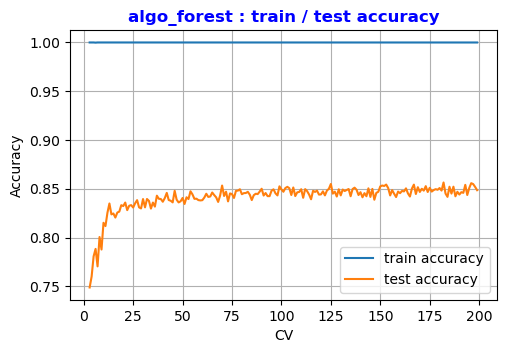





@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ algo_forest : best parameters information @@@@@@@@@@@@@@@
best test set accuracy = 0.856 , best test CV = 182 , associated train set accuracy = 1.000




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ algo_forest : best parameters metrics @@@@@@@@@@@@@@@@@@@
Confusion matrix :
[[863  33]
 [150 117]] 

Confusion matrix normalised :
[[863  33]
 [150 117]]

Classification report :
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       896
           1       0.78      0.44      0.56       267

    accuracy                           0.84      1163
   macro avg       0.82      0.70      0.73      1163
weighted avg       0.84      0.84      0.83      1163
 

Accuracy score	= 0.843
Recall score	= 0.438
Precision score	= 0.780
F1 score	= 0.561


In [23]:
random_forest_cv(is_affichage_in = True)

# 8. ENSEMBLE D'ARBRES DE DECISION - BOOSTING D'ARBRES DE REGRESSION / GBRT (GRADIENT BOOSTED REGRESSION TREES)

In [24]:
# ------------------------------------------------------------------------------------
# Fonction boosting d'arbres de régression / GBRT (Gradient Boosted Regression Trees) 
# ------------------------------------------------------------------------------------
def gradient_boosting_cv(is_affichage_in):

    # initialisation
    best_test_accuracy_gbrt_cv        = 0
    best_test_CV_gbrt_cv              = 0
    associated_train_accuracy_gbrt_cv = 0
    train_accuracy_estimator_cv       = []
    test_accuracy_estimator_cv        = []
    algo_name                        = 'algo_gbrt'


    # Estimator (sans hyperparamètres)
    gbrt_cv = GradientBoostingClassifier()

    # ---------------------------------------------------------
    # Recherche du meilleur score
    # ---------------------------------------------------------
    for ind in CV_settings:
   
        train_accuracy, test_accuracy = estimator_cv(gbrt_cv, ind)

        # Stockage dans les listes
        train_accuracy_estimator_cv.append(train_accuracy)
        test_accuracy_estimator_cv.append(test_accuracy)
    
        # Meilleur score (données test)    
        if (test_accuracy > best_test_accuracy_gbrt_cv):
            best_test_accuracy_gbrt_cv        = test_accuracy
            best_test_CV_gbrt_cv              = ind
            associated_train_accuracy_gbrt_cv = train_accuracy

        
    # ---------------------------------------------------------------------------------------------
    # Prédiction avec le meilleur cv = best_test_CV_xxx_cv
    # ---------------------------------------------------------------------------------------------
    y_pred_gbrt = cross_val_predict(estimator = gbrt_cv, 
                                    X         = X, 
                                    y         = y, 
                                    cv        = best_test_CV_gbrt_cv)


    # ---------------------------------------------------------------------------------------------
    # Affichage (pour comparaison) de l'exactitude de l'apprentissage et du test en fonction de cv
    # --------------------------------------------------------------------------------------------- 
    affichage_train_test_accuracy(algo_name_in      = algo_name,
                                  train_accuracy_in = train_accuracy_estimator_cv,
                                  test_accuracy_in  = test_accuracy_estimator_cv)
    
    
    # -------------------------------------------------------
    # Informations du meilleur score 
    # -------------------------------------------------------   
    print('\n\n\n')        
    print('@' * 40, algo_name, ': best parameters information', '@' * 15)    
    print('best test set accuracy = {:.3f}'.format(best_test_accuracy_gbrt_cv),
          ', best test CV =', best_test_CV_gbrt_cv,
          ', associated train set accuracy = {:.3f}'.format(associated_train_accuracy_gbrt_cv))    
    
    
    # -------------------------------------------------------
    # Métriques du meilleur score 
    # -------------------------------------------------------
    print('\n\n\n')        
    print('@' * 40, algo_name, ': best parameters metrics', '@' * 19)
    metrics_best_score(algo_name_in    = algo_name,
                       y_pred_in       = y_pred_gbrt,
                       is_affichage_in = is_affichage_in)        

train set accuracy = 0.985 , test set accuracy = 0.708 , CV =  3
train set accuracy = 0.972 , test set accuracy = 0.713 , CV =  4
train set accuracy = 0.970 , test set accuracy = 0.744 , CV =  5
train set accuracy = 0.968 , test set accuracy = 0.747 , CV =  6
train set accuracy = 0.966 , test set accuracy = 0.753 , CV =  7
train set accuracy = 0.965 , test set accuracy = 0.800 , CV =  8
train set accuracy = 0.965 , test set accuracy = 0.774 , CV =  9
train set accuracy = 0.962 , test set accuracy = 0.823 , CV =  10
train set accuracy = 0.962 , test set accuracy = 0.831 , CV =  11
train set accuracy = 0.962 , test set accuracy = 0.819 , CV =  12
train set accuracy = 0.959 , test set accuracy = 0.831 , CV =  13
train set accuracy = 0.960 , test set accuracy = 0.821 , CV =  14
train set accuracy = 0.959 , test set accuracy = 0.833 , CV =  15
train set accuracy = 0.960 , test set accuracy = 0.825 , CV =  16
train set accuracy = 0.959 , test set accuracy = 0.831 , CV =  17
train set accurac

train set accuracy = 0.956 , test set accuracy = 0.856 , CV =  127
train set accuracy = 0.956 , test set accuracy = 0.857 , CV =  128
train set accuracy = 0.956 , test set accuracy = 0.857 , CV =  129
train set accuracy = 0.956 , test set accuracy = 0.859 , CV =  130
train set accuracy = 0.956 , test set accuracy = 0.855 , CV =  131
train set accuracy = 0.956 , test set accuracy = 0.863 , CV =  132
train set accuracy = 0.956 , test set accuracy = 0.861 , CV =  133
train set accuracy = 0.956 , test set accuracy = 0.863 , CV =  134
train set accuracy = 0.956 , test set accuracy = 0.863 , CV =  135
train set accuracy = 0.956 , test set accuracy = 0.859 , CV =  136
train set accuracy = 0.956 , test set accuracy = 0.855 , CV =  137
train set accuracy = 0.956 , test set accuracy = 0.864 , CV =  138
train set accuracy = 0.956 , test set accuracy = 0.857 , CV =  139
train set accuracy = 0.956 , test set accuracy = 0.857 , CV =  140
train set accuracy = 0.955 , test set accuracy = 0.858 , CV = 

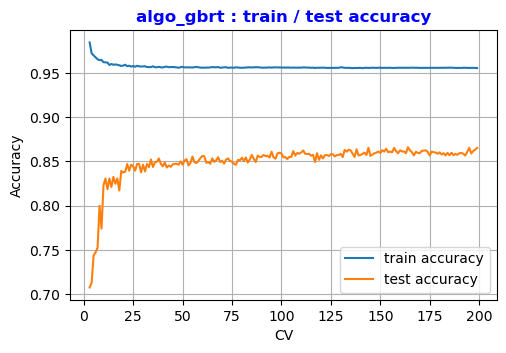





@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ algo_gbrt : best parameters information @@@@@@@@@@@@@@@
best test set accuracy = 0.866 , best test CV = 164 , associated train set accuracy = 0.956




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ algo_gbrt : best parameters metrics @@@@@@@@@@@@@@@@@@@
Confusion matrix :
[[858  38]
 [120 147]] 

Confusion matrix normalised :
[[858  38]
 [120 147]]

Classification report :
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       896
           1       0.79      0.55      0.65       267

    accuracy                           0.86      1163
   macro avg       0.84      0.75      0.78      1163
weighted avg       0.86      0.86      0.85      1163
 

Accuracy score	= 0.864
Recall score	= 0.551
Precision score	= 0.795
F1 score	= 0.650


In [25]:
gradient_boosting_cv(is_affichage_in = True)

# 9. RESEAUX DE NEURONES

In [26]:
# -------------------------------------------------------------------------------------------------
# Fonction perceptron multicouche (multilayer perceptron / MLP) 
# -------------------------------------------------------------------------------------------------
def perceptron_multicouche_cv(is_affichage_in):

    # initialisation
    best_test_accuracy_mlp_cv        = 0
    best_test_CV_mlp_cv              = 0
    associated_train_accuracy_mlp_cv = 0
    train_accuracy_estimator_cv      = []
    test_accuracy_estimator_cv       = []
    algo_name                        = 'algo_mlp'


    # Estimator (sans hyperparamètres)
    mlp_cv = MLPClassifier()
    
    # ---------------------------------------------------------
    # Recherche du meilleur score
    # ---------------------------------------------------------
    for ind in CV_settings:
   
        train_accuracy, test_accuracy = estimator_cv(mlp_cv, ind)
      
        # Stockage dans les listes
        train_accuracy_estimator_cv.append(train_accuracy)
        test_accuracy_estimator_cv.append(test_accuracy)
    
        # Meilleur score (données test)    
        if (test_accuracy > best_test_accuracy_mlp_cv):
            best_test_accuracy_mlp_cv        = test_accuracy
            best_test_CV_mlp_cv              = ind
            associated_train_accuracy_mlp_cv = train_accuracy

        
    # ---------------------------------------------------------------------------------------------
    # Prédiction avec le meilleur cv = best_test_CV_xxx_cv
    # ---------------------------------------------------------------------------------------------
    y_pred_mlp = cross_val_predict(estimator = mlp_cv, 
                                   X         = X, 
                                   y         = y, 
                                   cv        = best_test_CV_mlp_cv)
    
    
    # ---------------------------------------------------------------------------------------------
    # Affichage (pour comparaison) de l'exactitude de l'apprentissage et du test en fonction de cv
    # --------------------------------------------------------------------------------------------- 
    affichage_train_test_accuracy(algo_name_in      = algo_name,
                                  train_accuracy_in = train_accuracy_estimator_cv,
                                  test_accuracy_in  = test_accuracy_estimator_cv)
    
    
    # -------------------------------------------------------
    # Informations du meilleur score 
    # -------------------------------------------------------  
    print('\n\n\n')        
    print('@' * 40, algo_name, ': best parameters information', '@' * 15)    
    print('best test set accuracy = {:.3f}'.format(best_test_accuracy_mlp_cv),
          ', best test CV =', best_test_CV_mlp_cv,
          ', associated train set accuracy = {:.3f}'.format(associated_train_accuracy_mlp_cv)) 


    # -------------------------------------------------------
    # Métriques du meilleur score 
    # -------------------------------------------------------
    print('\n\n\n')        
    print('@' * 40, algo_name, ': best parameters metrics', '@' * 19)
    metrics_best_score(algo_name_in    = algo_name,
                       y_pred_in       = y_pred_mlp,
                       is_affichage_in = is_affichage_in)

train set accuracy = 0.893 , test set accuracy = 0.722 , CV =  3
train set accuracy = 0.858 , test set accuracy = 0.752 , CV =  4
train set accuracy = 0.864 , test set accuracy = 0.745 , CV =  5
train set accuracy = 0.875 , test set accuracy = 0.753 , CV =  6
train set accuracy = 0.863 , test set accuracy = 0.728 , CV =  7
train set accuracy = 0.841 , test set accuracy = 0.747 , CV =  8
train set accuracy = 0.842 , test set accuracy = 0.714 , CV =  9
train set accuracy = 0.851 , test set accuracy = 0.805 , CV =  10
train set accuracy = 0.854 , test set accuracy = 0.791 , CV =  11
train set accuracy = 0.855 , test set accuracy = 0.811 , CV =  12
train set accuracy = 0.846 , test set accuracy = 0.816 , CV =  13
train set accuracy = 0.849 , test set accuracy = 0.807 , CV =  14
train set accuracy = 0.839 , test set accuracy = 0.790 , CV =  15
train set accuracy = 0.846 , test set accuracy = 0.812 , CV =  16
train set accuracy = 0.860 , test set accuracy = 0.829 , CV =  17
train set accurac

C:\Users\valdu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


train set accuracy = 0.853 , test set accuracy = 0.801 , CV =  48
train set accuracy = 0.851 , test set accuracy = 0.816 , CV =  49
train set accuracy = 0.848 , test set accuracy = 0.818 , CV =  50
train set accuracy = 0.852 , test set accuracy = 0.822 , CV =  51
train set accuracy = 0.853 , test set accuracy = 0.808 , CV =  52
train set accuracy = 0.846 , test set accuracy = 0.803 , CV =  53
train set accuracy = 0.852 , test set accuracy = 0.817 , CV =  54
train set accuracy = 0.853 , test set accuracy = 0.815 , CV =  55
train set accuracy = 0.849 , test set accuracy = 0.818 , CV =  56
train set accuracy = 0.850 , test set accuracy = 0.813 , CV =  57
train set accuracy = 0.851 , test set accuracy = 0.809 , CV =  58
train set accuracy = 0.849 , test set accuracy = 0.807 , CV =  59
train set accuracy = 0.852 , test set accuracy = 0.807 , CV =  60
train set accuracy = 0.847 , test set accuracy = 0.816 , CV =  61
train set accuracy = 0.850 , test set accuracy = 0.813 , CV =  62
train set 

C:\Users\valdu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


train set accuracy = 0.850 , test set accuracy = 0.820 , CV =  172
train set accuracy = 0.852 , test set accuracy = 0.817 , CV =  173
train set accuracy = 0.852 , test set accuracy = 0.828 , CV =  174
train set accuracy = 0.853 , test set accuracy = 0.826 , CV =  175
train set accuracy = 0.853 , test set accuracy = 0.823 , CV =  176
train set accuracy = 0.852 , test set accuracy = 0.824 , CV =  177
train set accuracy = 0.853 , test set accuracy = 0.819 , CV =  178
train set accuracy = 0.854 , test set accuracy = 0.814 , CV =  179
train set accuracy = 0.850 , test set accuracy = 0.823 , CV =  180


C:\Users\valdu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


train set accuracy = 0.852 , test set accuracy = 0.816 , CV =  181
train set accuracy = 0.850 , test set accuracy = 0.814 , CV =  182
train set accuracy = 0.851 , test set accuracy = 0.817 , CV =  183
train set accuracy = 0.851 , test set accuracy = 0.825 , CV =  184


C:\Users\valdu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


train set accuracy = 0.850 , test set accuracy = 0.810 , CV =  185
train set accuracy = 0.851 , test set accuracy = 0.832 , CV =  186
train set accuracy = 0.854 , test set accuracy = 0.821 , CV =  187
train set accuracy = 0.849 , test set accuracy = 0.817 , CV =  188
train set accuracy = 0.849 , test set accuracy = 0.818 , CV =  189
train set accuracy = 0.853 , test set accuracy = 0.821 , CV =  190
train set accuracy = 0.849 , test set accuracy = 0.815 , CV =  191
train set accuracy = 0.852 , test set accuracy = 0.824 , CV =  192
train set accuracy = 0.852 , test set accuracy = 0.809 , CV =  193
train set accuracy = 0.851 , test set accuracy = 0.834 , CV =  194
train set accuracy = 0.853 , test set accuracy = 0.831 , CV =  195
train set accuracy = 0.852 , test set accuracy = 0.807 , CV =  196
train set accuracy = 0.851 , test set accuracy = 0.823 , CV =  197
train set accuracy = 0.852 , test set accuracy = 0.821 , CV =  198
train set accuracy = 0.850 , test set accuracy = 0.824 , CV = 

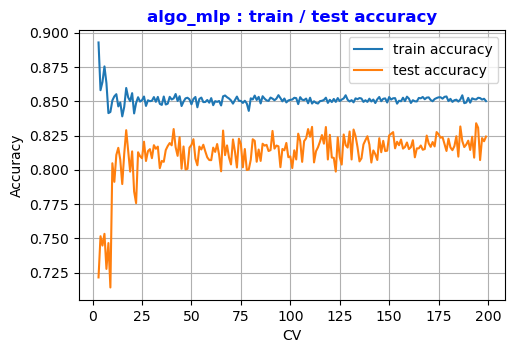





@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ algo_mlp : best parameters information @@@@@@@@@@@@@@@
best test set accuracy = 0.834 , best test CV = 194 , associated train set accuracy = 0.851




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ algo_mlp : best parameters metrics @@@@@@@@@@@@@@@@@@@
Confusion matrix :
[[820  76]
 [128 139]] 

Confusion matrix normalised :
[[820  76]
 [128 139]]

Classification report :
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       896
           1       0.65      0.52      0.58       267

    accuracy                           0.82      1163
   macro avg       0.76      0.72      0.73      1163
weighted avg       0.81      0.82      0.82      1163
 

Accuracy score	= 0.825
Recall score	= 0.521
Precision score	= 0.647
F1 score	= 0.577


In [27]:
perceptron_multicouche_cv(is_affichage_in = True)

# 10. SYNTHESE

In [ ]:
# | algo_xxx        | knn   | logreg | linear_svm |  tree | forest |  gbrt  |  mlp  | Meilleur score |
# |-----------------|-------|--------|------------|-------|--------|--------|-------|----------------|
# | accuracy_score  | 0.771 |  0.841 |    0.847   | 0.764 |  0.843 |  0.864 | 0.825 |      gbrt      |
# | recall_score    | 0.225 |  0.502 |    0.494   | 0.517 |  0.438 |  0.551 | 0.521 |      gbrt      |
# | precision_score | 0.504 |  0.720 |    0.754   | 0.488 |  0.780 |  0.795 | 0.647 |      gbrt      |
# | f1_score        | 0.311 |  0.592 |    0.597   | 0.502 |  0.561 |  0.650 | 0.577 |      gbrt      |
# | best_test_CV    |  152  |   131  |     134    |   95  |   182  |   164  |  194  |      -         |
#
# Meilleurs scores : algo_gbrt 